In [43]:
from sklearn.neighbors import KNeighborsClassifier as kNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score as acc

import matplotlib.pyplot as plt

import numpy as np

# import dataset packages
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary

## Dataset Generation ## 

### kNN ###
Advantages:
- Easy to implement for multiclass problems

Disadvantages:
- KNN is very sensitive to outliers
- Dimensionality: KNN is more appropriate to use when you have a small number of inputs.
- Class imbalance can be an issue: kNN might wrongly vote for majority class
- Sample size needs to be large enough and dense enough

### Decision Trees ###
Advantages:
+ Good with High Level Data: e.g. age, income

Disadvantages:
- Bad with Low Level Data: data with many predictors/inputs
- Trees can overfit: Overfitting increases with depth of tree

In [44]:
def data_nn():

    # kNN score - 0.92
    # DT score - 0.86
    # nn_X, nn_y = make_blobs(
    #     n_samples=1500,
    #     n_features=2,
    #     centers=220,
    #     cluster_std=.16,
    #     random_state=42
    # )
    # nn_y = nn_y % 2 # to reduce the amount of different labels to 2

    nn_X, nn_y = make_blobs(
        n_samples=[250, 250], 
        centers=[(3,5),(6,5)],             
        n_features=2, 
        cluster_std=[1, 1],
        random_state=42, 
        shuffle=False)

    # nn_X, nn_y = make_moons(
    #     n_samples=[250, 250], 
    #     noise=0.5)

    return nn_X, nn_y

In [45]:
def data_dt():

    # kNN score - 0.78 (k = 12) 0.70 (k = 3)
    # DT score - 0.63
    # dt_X, dt_y = make_blobs(
    #     n_samples=[700, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # kNN score - 0.86 (12)
    # DT score - 0.88 (15, 10)
    # dt_X, dt_y = make_blobs(
    #     n_samples=[200, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=4, 
    #     # cluster_std=[2, 1],
    #     random_state=1, 
    #     shuffle=False)

    # knn 0.91
    # dt 0.95
    dt_X, dt_y = make_blobs(
        n_samples=[250, 50], 
        centers=[(3,5),(6,5)],             
        n_features=2, 
        cluster_std=[3, 1],
        random_state=42, 
        shuffle=False)


    # dt_X, dt_y = make_blobs(
    #     n_samples=[250, 250], 
    #     # centers=[(3,5),(6,5)],             
    #     n_features=4, 
    #     cluster_std=[3, 1],
    #     random_state=42, 
    #     )

    # dt_X, dt_y = make_circles(
    #     noise=0.2, 
    #     factor=0.5, 
    #     random_state=1)

    # dt_X, dt_y = make_blobs(
    #     n_samples=[300, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     # cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # knn - 0.89 
    # dt - 0.89
    # dt_X, dt_y = m'ake_moons(
    #     n_samples=[200, 200], 
    #     noise=0.3)'

    return dt_X, dt_y

kNN dataset shape X: (500, 2)
kNN dataset shape Y: (500,)
kNN dataset example row X: [3.49671415 4.8617357 ]
kNN dataset example row Y: 0


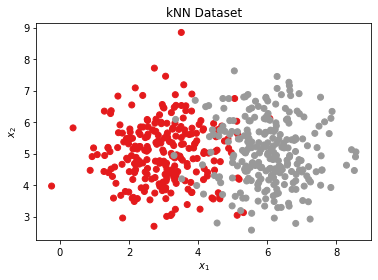

DT dataset shape X: (300, 2)
DT dataset shape Y: (300,)
DT dataset example row X: [4.49014246 4.5852071 ]
DT dataset example row Y: 0


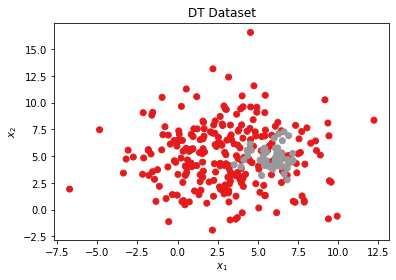

DT dataset shape X train: (201, 2)
DT dataset shape X test: (99, 2)


In [46]:
# kNN data generation and splitup
nn_X, nn_y = data_nn()
print('kNN dataset shape X:', nn_X.shape)
print('kNN dataset shape Y:', nn_y.shape)
print('kNN dataset example row X:', nn_X[0])
print('kNN dataset example row Y:', nn_y[0])
plot_2d(nn_X, nn_y, 'kNN Dataset')

nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(nn_X, nn_y, test_size=.33, random_state=42)

# Decision Tree data generation and splitup
dt_X, dt_y = data_dt()
print('DT dataset shape X:', dt_X.shape)
print('DT dataset shape Y:', dt_y.shape)
print('DT dataset example row X:', dt_X[0])
print('DT dataset example row Y:', dt_y[0])
plot_2d(dt_X, dt_y, 'DT Dataset')

dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=.33, random_state=42)
print('DT dataset shape X train:', dt_X_train.shape)
print('DT dataset shape X test:', dt_X_test.shape)


## Evaluation and Plotting Methods ##

In [47]:
# EVALUATION

# method to get accuracy of model
def model_score(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([acc(y_test,y_test_pred),
                     acc(y_train,y_train_pred)])

# kNN Evaluation 
def knn_classifier_score(k,X_train,y_train,X_test,y_test):
    # print(k)
    model=kNC(n_neighbors=k).fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([ 1 - acc(y_test,y_test_pred),
                      1 - acc(y_train,y_train_pred)])


# Decision Tree Evaluation
def dt_classifier_score(X_train,y_train,X_test,y_test, max_depth=None, min_samples_split=2):
    # print(max_depth)
    model=DTC(
        criterion='entropy', 
        max_depth=max_depth, 
        min_samples_split=min_samples_split
        )
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([ 1 - acc(y_test,y_test_pred),
                      1 - acc(y_train,y_train_pred)])

#  Underfitting – Validation and training error high
#  Overfitting – Validation error is high, training error low
#  Good fit – Validation error low, slightly higher than the training error
#  Unknown fit - Validation error low, training error 'high'


In [48]:
# PLOTTING

# plot errors
def plot_test_training_err(param_values, test_err, train_err, title, hyperparam):
    plt.xlabel('$' + hyperparam + '$')
    plt.ylabel('$classification~~error$')
    # plt.ylabel('$score$')
    plt.title(title)
    plt.plot(param_values,test_err,color='red')
    plt.plot(param_values,train_err,color='blue')
    plt.legend(['test','train']);
    plt.show()

## Hyperparameters ##

In [59]:
# Hyperparameters

# kNN
k_nn = 7
k_dt = 5
k_values = np.arange(1, 30, 2)

# DT
criterion = 'entropy'
# min_samples_split best between [2, 40] (see https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
# if value too small trees tend to overfit
# Imbalanced class problem: because then regions in which the minority class will be in majority 
# will be very small so min_samples_split should be lower
min_samples_split_nn = 20
min_samples_split_dt = 6
samples_values = np.arange(2, 60, 2)
max_depth_nn = None
max_depth_dt = 25
depth_values = np.arange(1, 60, 5)

## Dataset kNN ##

### Comprare Performance kNN and DT ###

kNN score on kNN dataset: 0.95


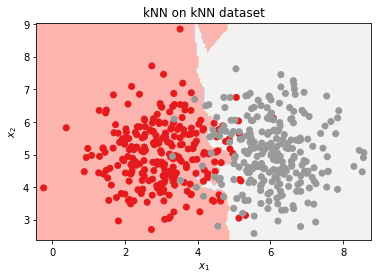

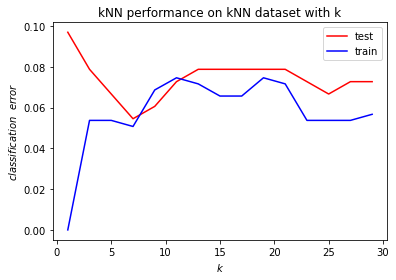

In [60]:
# kNN

knn = kNC(n_neighbors=k_nn)
knn.fit(nn_X_train, nn_y_train)
print('kNN score on kNN dataset: %.2f' % (knn.score(nn_X_test, nn_y_test)))

plot_classifier_boundary(knn, nn_X, nn_y, title='kNN on kNN dataset')

# Hyperparameter testing
errors = map(lambda k: knn_classifier_score(k, nn_X_train, nn_y_train, nn_X_test, nn_y_test), k_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(k_values, test_error, train_error, 
title='kNN performance on kNN dataset with k', 
hyperparam='k')

DT score on kNN dataset: 0.92


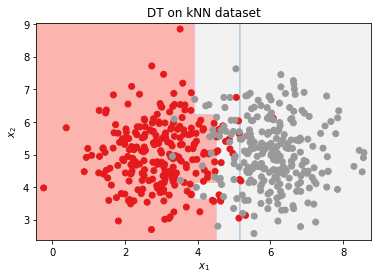

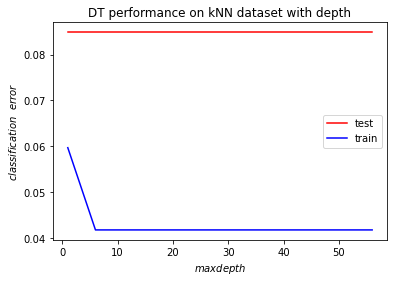

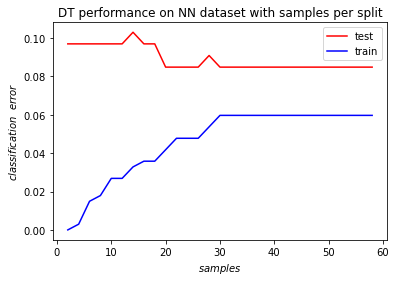

In [61]:
# Decision Trees

dtree=DTC(criterion=criterion, max_depth=max_depth_nn, min_samples_split=min_samples_split_nn)
dtree.fit(nn_X_train, nn_y_train)

print('DT score on kNN dataset: %.2f' % (dtree.score(nn_X_test, nn_y_test)))

plot_classifier_boundary(dtree, nn_X, nn_y, title='DT on kNN dataset')
# plot_tree(dtree)

# Hyperparameter testing
# DT Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(
    nn_X_train, nn_y_train, 
    nn_X_test, nn_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_nn), depth_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(depth_values, test_error, train_error, 
title='DT performance on kNN dataset with depth', 
hyperparam='max depth')

# DT Hyperparam Tuning
errors = map(lambda sample: dt_classifier_score(
    nn_X_train, nn_y_train, 
    nn_X_test, nn_y_test, 
    max_depth=max_depth_nn, 
    min_samples_split=sample), samples_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(samples_values, test_error, train_error, 
title='DT performance on NN dataset with samples per split', 
hyperparam='samples')


## Dataset DT ##

### Compare Performance of kNN and DT ### 

kNN score on DT dataset: 0.91


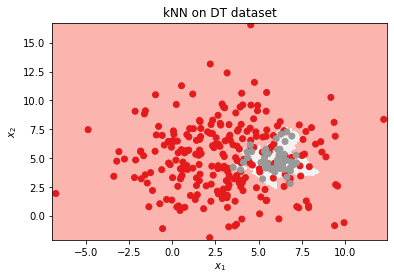

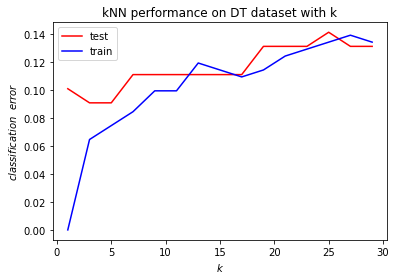

In [62]:
# kNN
knn = kNC(n_neighbors=k_dt)
knn.fit(dt_X_train, dt_y_train)
print('kNN score on DT dataset: %.2f' % (knn.score(dt_X_test, dt_y_test)))


x_min, x_max = dt_X[:, 0].min()-.2, dt_X[:, 0].max()+.2
y_min, y_max = dt_X[:, 1].min()-.2, dt_X[:, 1].max()+.2
# generate a grid with step h
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                    np.arange(y_min, y_max, .05))
x_temp = xx.ravel()

predict_input = np.c_[xx.ravel(), yy.ravel()]

plot_classifier_boundary(knn, dt_X, dt_y, title='kNN on DT dataset')

# hyperparameter testing
errors = map(lambda k: knn_classifier_score(k, dt_X_train, dt_y_train, dt_X_test, dt_y_test), k_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(k_values, test_error, train_error, 
title='kNN performance on DT dataset with k', 
hyperparam='k')

DT score on DT dataset: 0.95


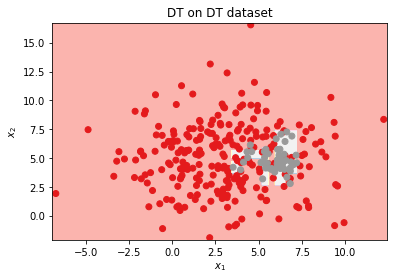

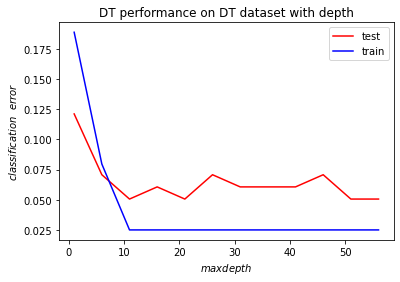

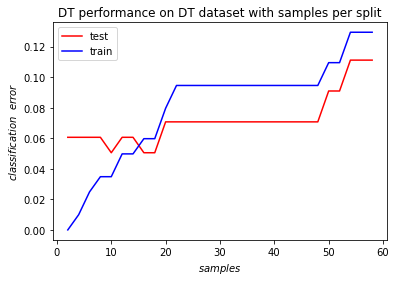

In [63]:
# Decision Trees
# add cross validation to find right hyperparameters

dtree=DTC(criterion='entropy', max_depth=max_depth_dt, min_samples_split=min_samples_split_dt)
dtree.fit(dt_X_train, dt_y_train)

print('DT score on DT dataset: %.2f' % (dtree.score(dt_X_test, dt_y_test)))

plot_classifier_boundary(dtree, dt_X, dt_y, title='DT on DT dataset')
# plot_tree(dtree)

# hyperparameter tuning
# max depth
errors = map(lambda depth: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_dt), depth_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(depth_values, test_error, train_error, 
title='DT performance on DT dataset with depth', 
hyperparam='max depth')

# min samples per split
errors = map(lambda sample: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test,
    max_depth=max_depth_dt,
    min_samples_split=sample), samples_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(samples_values, test_error, train_error, 
title='DT performance on DT dataset with samples per split', 
hyperparam='samples')